In [1]:
import sys, os, pathlib
from pyprojroot import here
root = here(project_files=[".here"])
sys.path.append(str(here()))

PROJ_PATH = pathlib.Path(root)

import scipy.io as scio

# NUMPY SETTINGS
import numpy as np
np.set_printoptions(precision=3, suppress=True)

# MATPLOTLIB Settings
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# SEABORN SETTINGS
import seaborn as sns
sns.set_context(context='talk',font_scale=0.7)
# sns.set(rc={'figure.figsize': (12, 9.)})
# sns.set_style("whitegrid")

# PANDAS SETTINGS
import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

# LOGGING SETTINGS
import sys
import logging
logging.basicConfig(
    level=logging.INFO, 
    stream=sys.stdout,
    format='%(asctime) s:%(levelname) s:%(message)s '
)
logger = logging.getLogger()
#logger.setLevel(logging.INFO)

%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = pathlib.Path("/media/disk/erc/papers/IM_Datacube/RES/2019_CI/")
DATA_NEW_PATH = PROJ_PATH.joinpath("data/spa_temp/entropy/old_results")
FIG_PATH = PROJ_PATH.joinpath("docs/pics/entropy/old_results")


file_name = '2019_CI_FIG_ENTR_RBIG_2001_'
variables = [
    'precipitation',
    'root_moisture',
    'water_vapour',
    'potential_evaporation',
    'evaporation',
    'open_water_evaporation',
    'sensible_heat',
    'snow_sublimation',
    'soil_moisture',
    'surface_moisture',
    'terrestrial_ecosystem_respiration',
    'transpiration'
    
]


dims = [
    4, 9, 16, 25, 36, 49
]

In [3]:
!ls /media/disk/erc/papers/IM_Datacube/RES/2019_CI/

2019_CI_FIG_ENTR_RBIG_2001_evaporation_7_46.mat
2019_CI_FIG_ENTR_RBIG_2001_open_water_evaporation_7_46.mat
2019_CI_FIG_ENTR_RBIG_2001_potential_evaporation_7_46.mat
2019_CI_FIG_ENTR_RBIG_2001_precipitation_7_46.mat
2019_CI_FIG_ENTR_RBIG_2001_root_moisture_7_46.mat
2019_CI_FIG_ENTR_RBIG_2001_sensible_heat_7_46.mat
2019_CI_FIG_ENTR_RBIG_2001_snow_sublimation_7_46.mat
2019_CI_FIG_ENTR_RBIG_2001_soil_moisture_7_46.mat
2019_CI_FIG_ENTR_RBIG_2001_surface_moisture_7_46.mat
2019_CI_FIG_ENTR_RBIG_2001_terrestrial_ecosystem_respiration_7_46.mat
2019_CI_FIG_ENTR_RBIG_2001_transpiration_7_46.mat
2019_CI_FIG_ENTR_RBIG_2001_water_vapour_7_46.mat


In [5]:
results_df = pd.DataFrame()
for ivariable in variables:
    data_mat = scio.loadmat(
        DATA_PATH.joinpath(f"{file_name}{ivariable}_7_46.mat")
    )
    for idims, (ratio, entropy) in zip(dims, data_mat['RES'][0]):
        for iratio, ientropy in zip(np.nditer(ratio), np.nditer(entropy)):
    #         print(type(idims))
    #         print(type(iratio))
    #         print(type(ientropy))
            results_df = results_df.append({
                'variable': ivariable,
                'ratio': float(iratio),
                'h': float(ientropy),
                'dims': float(idims)
            }, ignore_index=True)

results_df.to_csv(DATA_NEW_PATH.joinpath("old_results.csv"))

# len(precip_mat['RES'][0])

In [6]:
# results_df['dims'] = pd.to_int
results_df.tail()

,dims,h,ratio,variable
283,49.0,-4.484311,0.2,transpiration
284,49.0,-4.512916,0.4,transpiration
285,49.0,-4.488969,0.6,transpiration
286,49.0,-4.353843,0.8,transpiration
287,49.0,-3.387003,1.0,transpiration


In [7]:
precip_df = results_df[results_df['variable'] == 'precipitation']
root_df = results_df[results_df['variable'] == 'root_moisture']
water_df = results_df[results_df['variable'] == 'water_vapour']

precip_df.head()

,dims,h,ratio,variable
0,4.0,-2.096325,0.0,precipitation
1,4.0,-0.345615,1.0,precipitation
2,9.0,-2.431879,0.0,precipitation
3,9.0,-1.859492,0.5,precipitation
4,9.0,-0.635933,1.0,precipitation


In [8]:
precip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dims      24 non-null     float64
 1   h         24 non-null     float64
 2   ratio     24 non-null     float64
 3   variable  24 non-null     object 
dtypes: float64(3), object(1)
memory usage: 960.0+ bytes


In [9]:
def plot_entropy(variable, save=True):
    fig, ax = plt.subplots(figsize=(7,5))
    # sns.lineplot(ax=ax, x="I", y="n_features", data=fmri)
    sub_df = results_df[results_df['variable'] == variable]

    sns.lineplot(
        ax=ax, x='ratio', y='h', 
        data=sub_df, hue=sub_df.dims.values, 
        marker='o',markersize=10)
    # sns.lineplot(ax=ax, x='nm_features', y='I', data=ndvi_df, label=label_main, linewidth=4,)
    ax.set_xlabel('Ratio', )
    ax.set_ylabel('Entropy')
    plt.legend(dims)
    plt.tight_layout()
    if save:
        fig.savefig(FIG_PATH.joinpath(f"esdc_{variable}.png"), frameon=False, )
    else:
        plt.show()

<ipython-input-9-8cf3b7a45321>:16: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(FIG_PATH.joinpath(f"esdc_{variable}.png"), frameon=False, )
<ipython-input-9-8cf3b7a45321>:16: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(FIG_PATH.joinpath(f"esdc_{variable}.png"), frameon=False, )
<ipython-input-9-8cf3b7a45321>:16: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(FIG_PATH.joinpath(f"esdc_{variable}.png"), frameon=False, )
<ipython-input-9-8cf3b7a45321>:16: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(FIG_PATH.joinpath(f"esdc_{variable}.png"), frameon=False, )
<ipython-input-9-8cf3b7a45321>:1

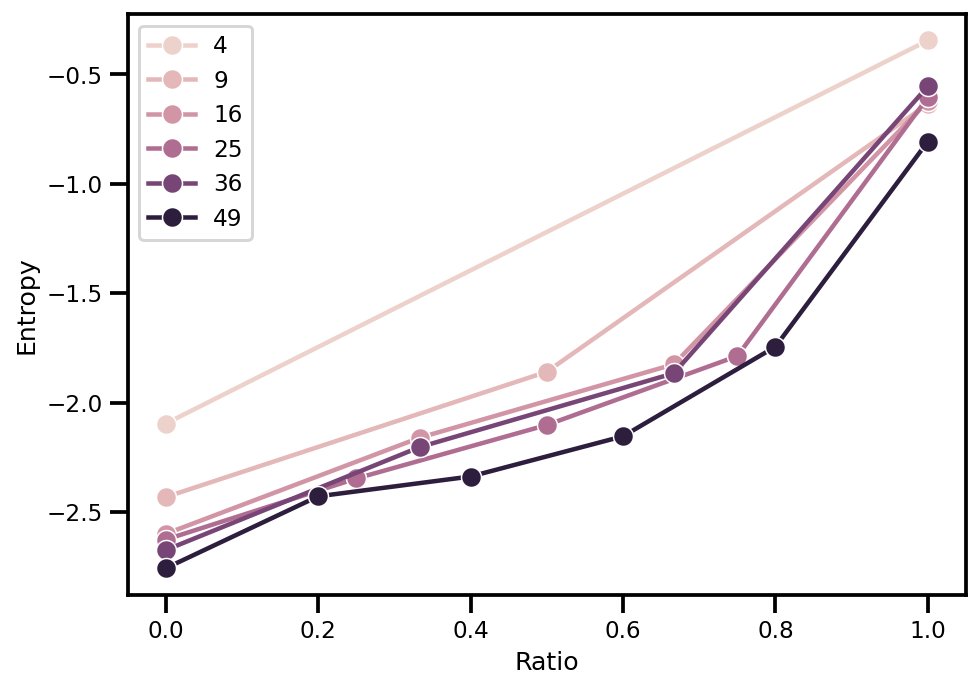

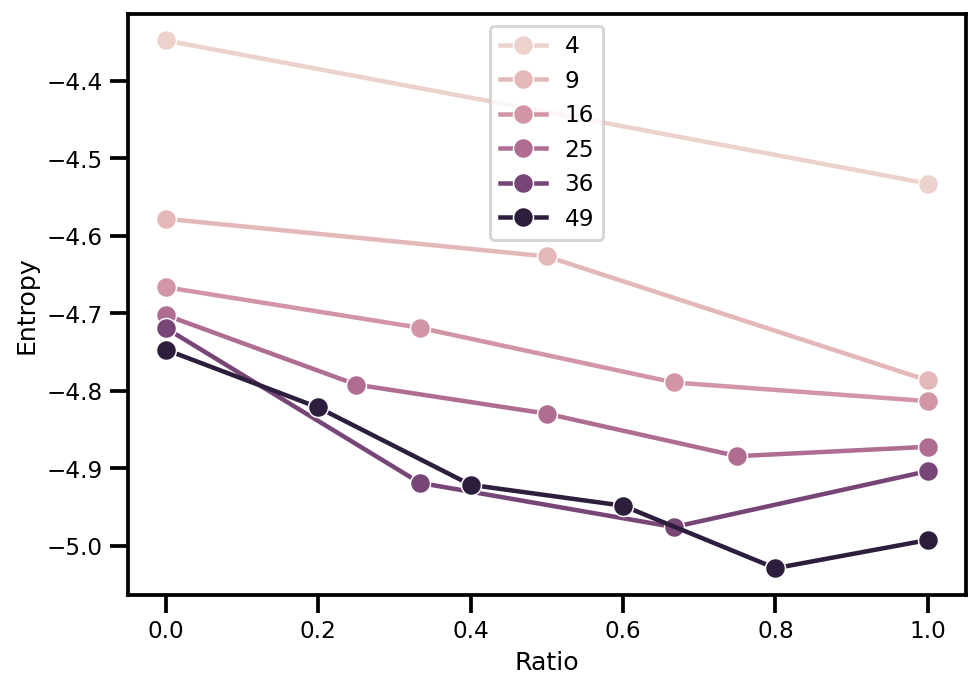

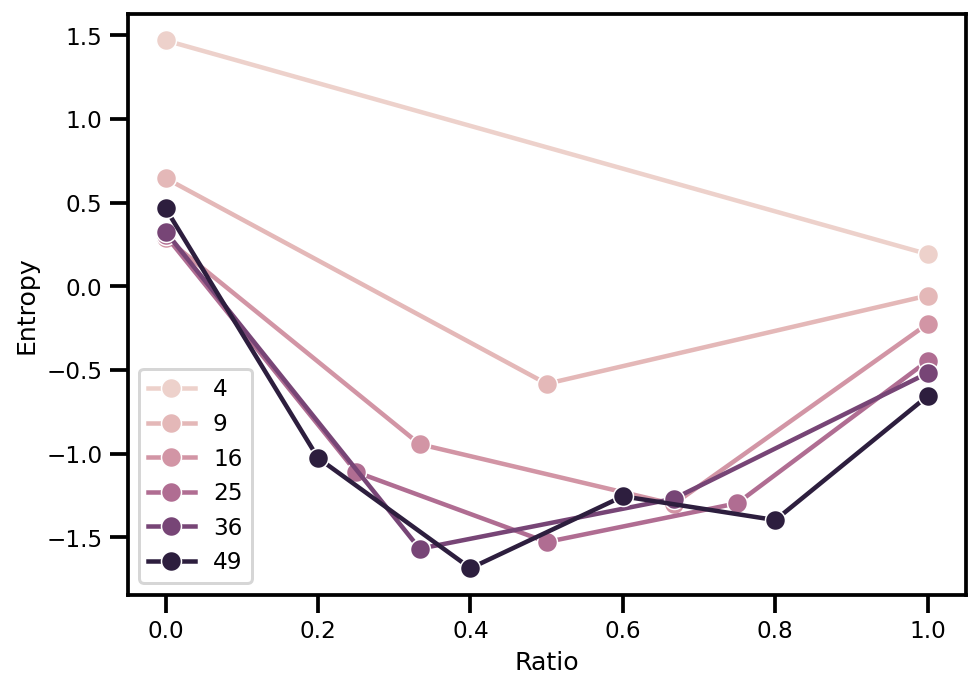

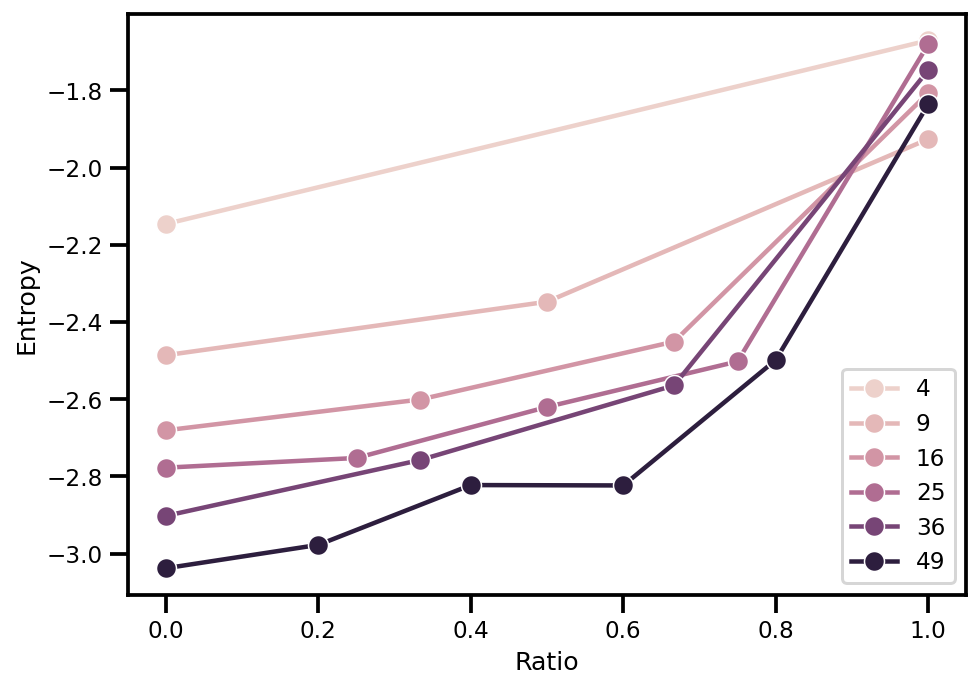

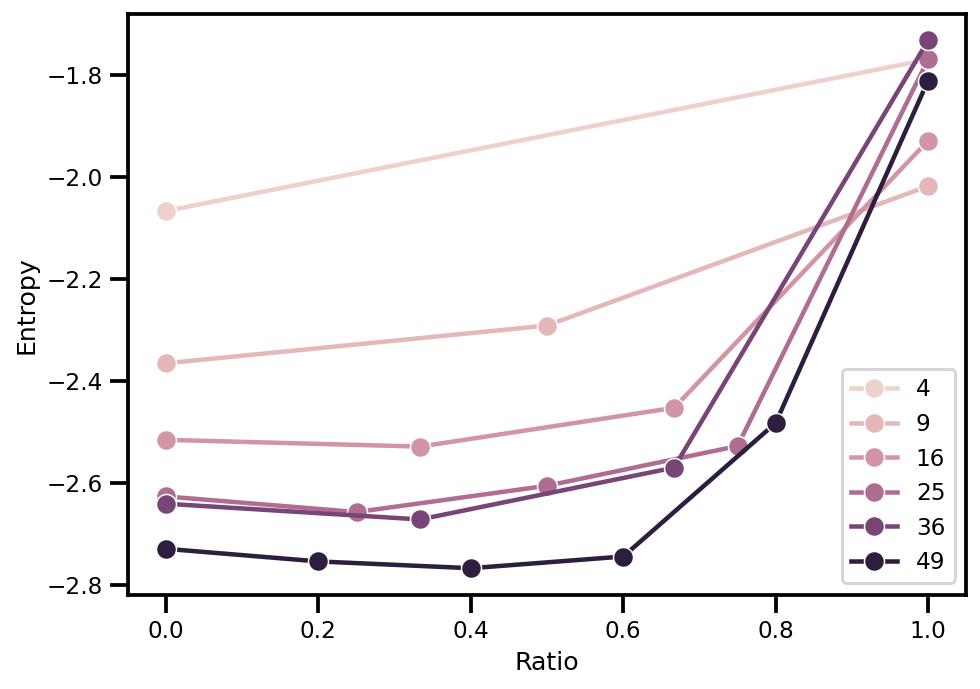

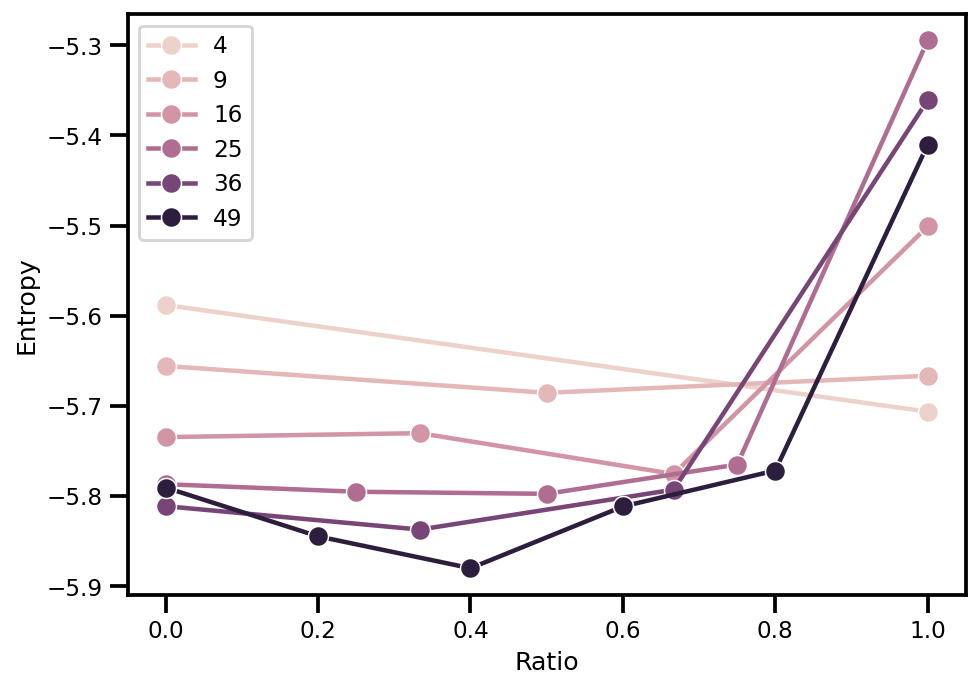

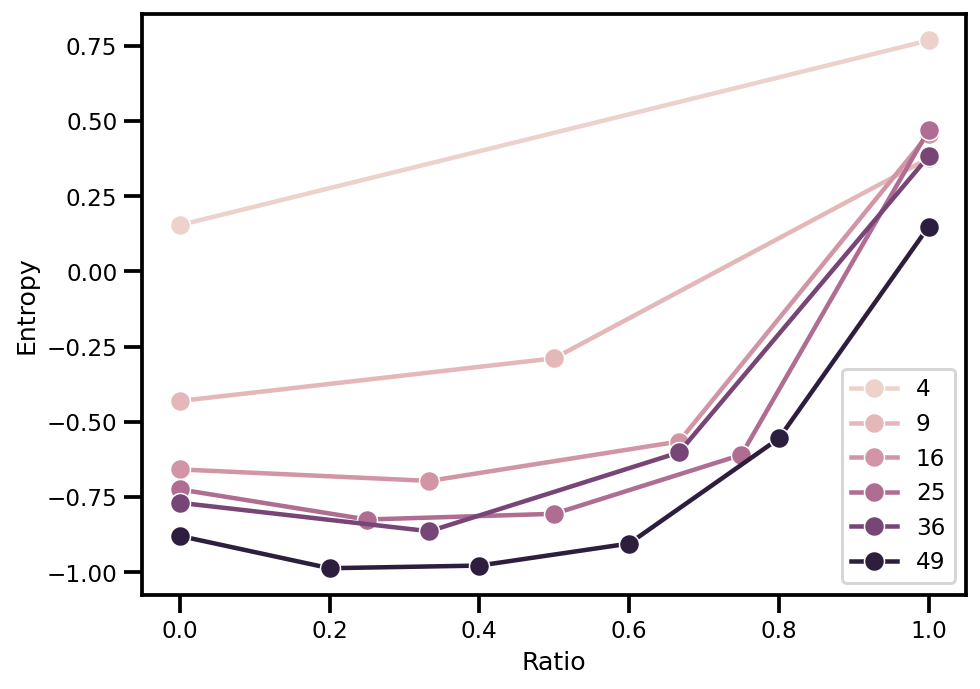

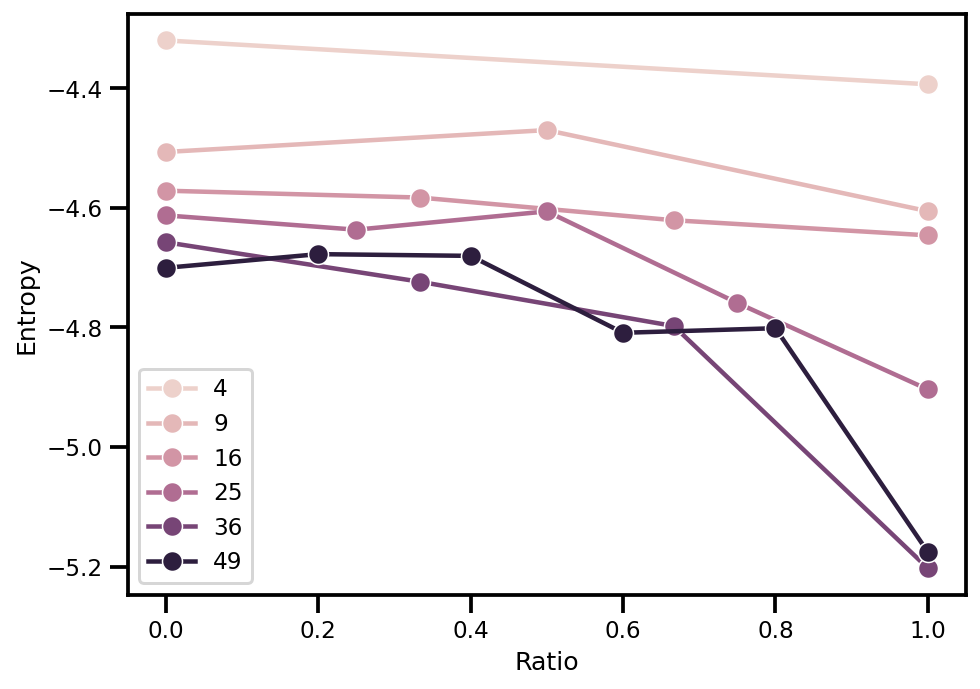

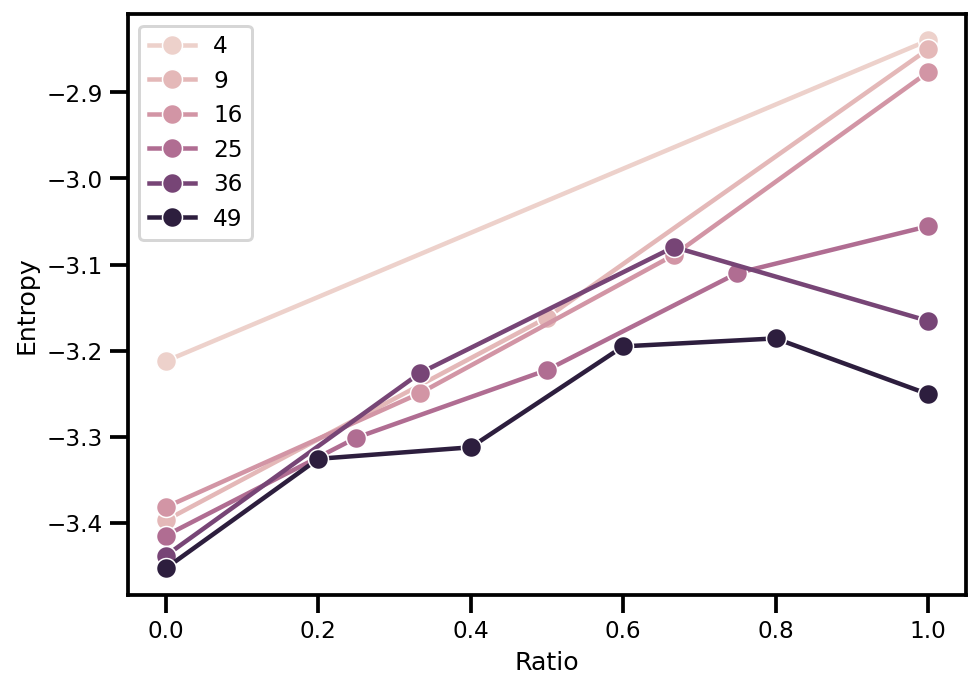

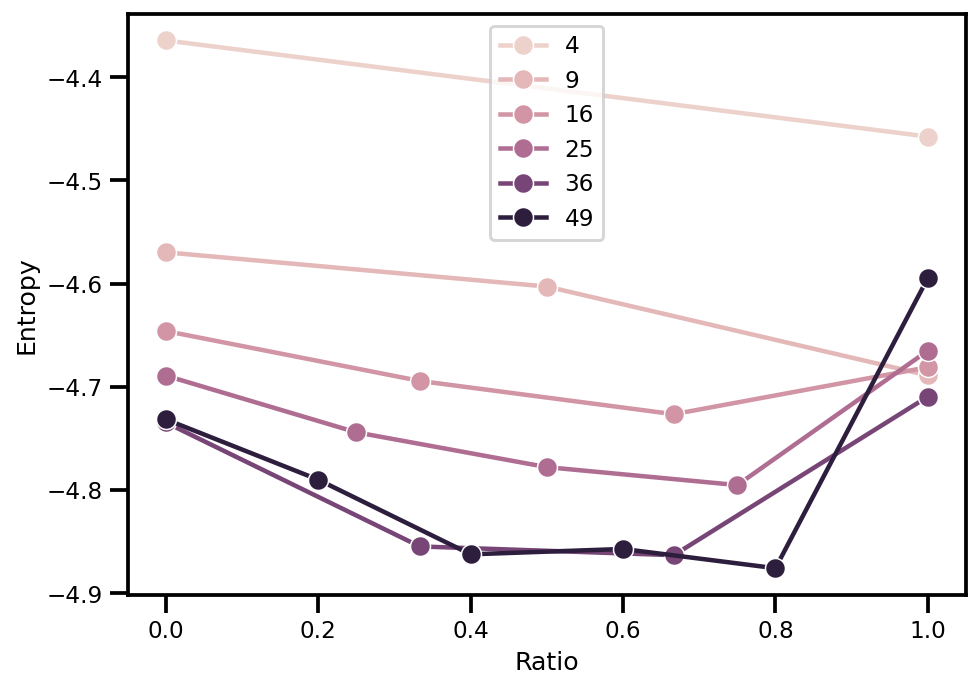

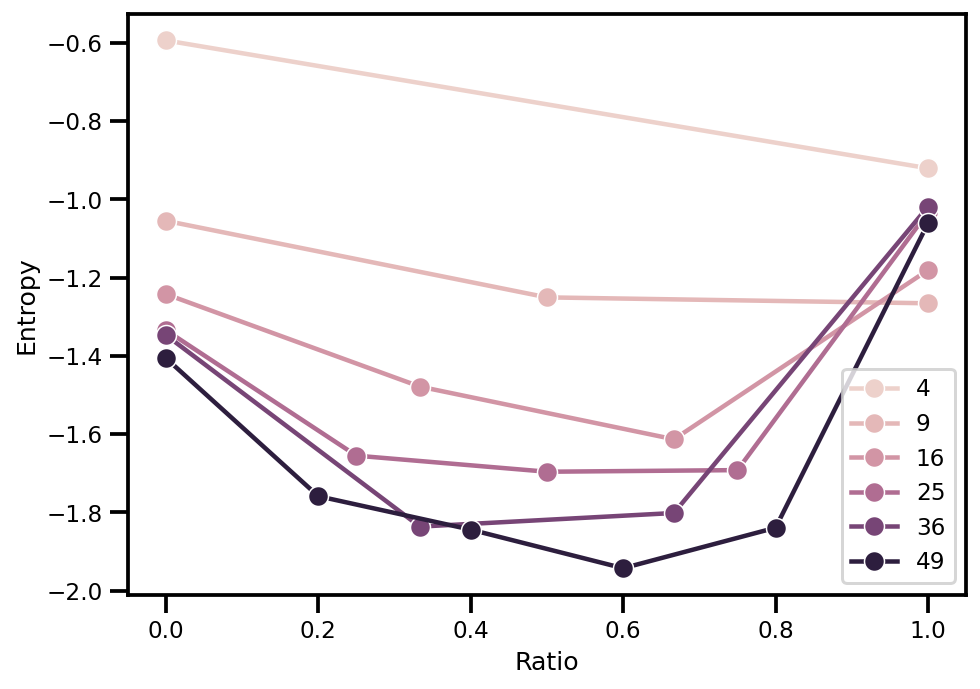

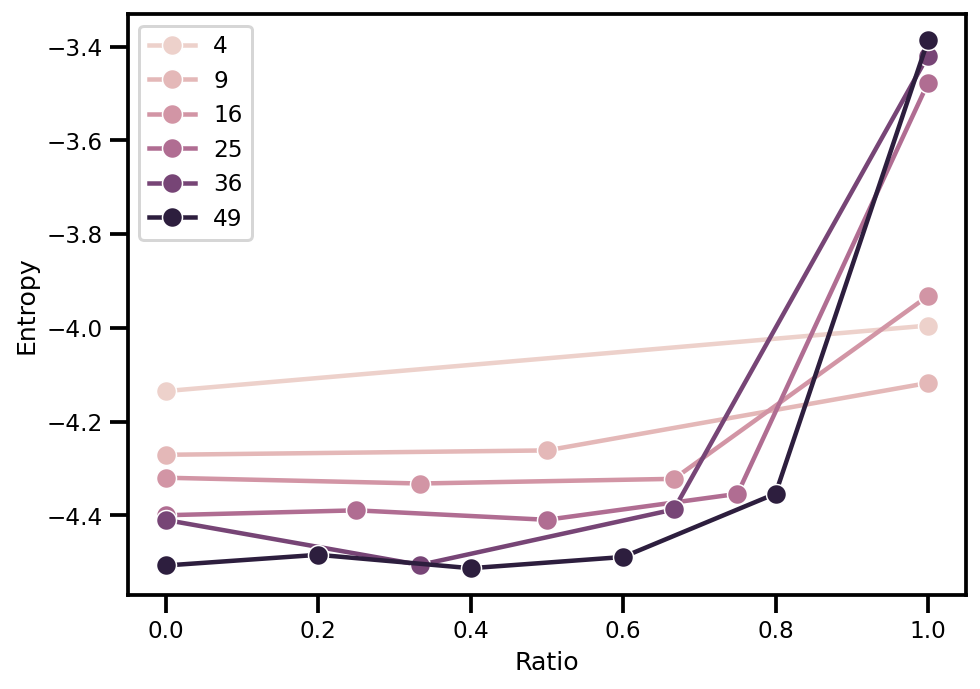

In [10]:
for ivariable in variables:
    plot_entropy(ivariable, True)